In [91]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as SS

In [92]:
H = np.linspace(0,1,9)
sigma = np.array([1.0])

In [93]:
N = 3000
Seed = 120
E = 2

In [94]:
X=[]
for h in H:
    for s in sigma:
        X.append(SS.fBm(N,E,h,s,Seed,exp=False))

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


In [95]:
X = np.asarray(X)

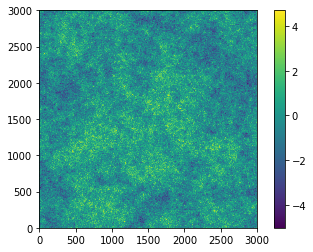

In [96]:
plt.imshow(X[0,:,:], origin = 'lower')
plt.colorbar()
plt.show()

In [97]:
M=1000
upper = (N+M)//2
lower = (N-M)//2

In [98]:
X_slice = X[:,lower:upper,lower:upper]
N = np.shape(X_slice)
print(N)

(9, 1000, 1000)


In [99]:
import DeltaVar as DV

In [100]:
L = 10**(np.linspace(np.log10(0.003),np.log10(0.1), 100))
v = 1.5

In [101]:
sigma_d = []
H_params = []
A_params = []
B_params = []
for i in range(0,np.shape(X_slice)[0]):
    sigma_d_i = []
    for j in range(0,len(L)):
        sigma_d_i.append(DV.DeltaVar(X_slice[i,:,:],L[j],v, method = 'convolve'))
        print(str(i)+':'+str(j))
    sigma_d.append(sigma_d_i)
    params = DV.HurstEstimator(sigma_d_i,L,shift=0.5)
    H_params.append(params[0])
    A_params.append(params[1])
    B_params.append(params[2])
    
sigma_d = np.asarray(sigma_d)
H_params = np.asarray(H_params)
A_params = np.asarray(A_params)
B_params = np.asarray(B_params)    
    
plt.figure()
for i in range(0,np.shape(X_slice)[0]):
    plt.plot(np.log10(L),np.log10(sigma_d[i]))
plt.show()    

0:0
0:1
0:2
0:3
0:4
0:5
0:6
0:7
0:8
0:9
0:10
0:11
0:12
0:13
0:14
0:15
0:16
0:17
0:18
0:19
0:20
0:21
0:22
0:23
0:24
0:25
0:26
0:27
0:28
0:29
0:30
0:31
0:32
0:33
0:34
0:35
0:36
0:37
0:38
0:39
0:40
0:41
0:42
0:43
0:44
0:45
0:46
0:47
0:48
0:49
0:50
0:51
0:52
0:53
0:54
0:55
0:56
0:57
0:58
0:59
0:60
0:61
0:62
0:63
0:64
0:65
0:66
0:67
0:68
0:69
0:70
0:71
0:72
0:73
0:74
0:75
0:76
0:77
0:78
0:79
0:80
0:81
0:82
0:83
0:84
0:85
0:86
0:87
0:88
0:89
0:90
0:91
0:92
0:93
0:94
0:95
0:96
0:97
0:98
0:99
1:0
1:1
1:2
1:3
1:4
1:5
1:6
1:7
1:8
1:9
1:10
1:11
1:12
1:13
1:14
1:15
1:16
1:17
1:18
1:19
1:20
1:21
1:22
1:23
1:24
1:25
1:26
1:27
1:28
1:29
1:30
1:31
1:32
1:33
1:34
1:35
1:36
1:37
1:38
1:39
1:40
1:41
1:42
1:43
1:44
1:45
1:46
1:47
1:48
1:49
1:50
1:51
1:52
1:53
1:54
1:55
1:56
1:57
1:58
1:59
1:60
1:61
1:62
1:63
1:64
1:65
1:66
1:67
1:68
1:69
1:70
1:71
1:72
1:73
1:74
1:75
1:76
1:77
1:78
1:79
1:80
1:81
1:82
1:83
1:84
1:85
1:86
1:87
1:88
1:89
1:90
1:91
1:92
1:93
1:94
1:95
1:96
1:97
1:98
1:99
2:0
2:1
2:2
2:3
2:4


KeyboardInterrupt: 

In [ ]:
log_L =np.log10(L)
log_sigma_d = np.log10(sigma_d)

In [ ]:
A = A_params[:,0]
B = B_params[:,0]

In [ ]:
H_est = H_params[:,0]
H_std = H_params[:,1]

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(1080/144, 1080/144), dpi=144)
ax = fig.add_subplot(111,zorder=1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

for a, i in zip(axes.flat[0:], range(0,9)):
    a.set_zorder(2)
    if i == 0 or i == 1 or i ==2:
        a.text(0.05,0.9,r'$H = $'+str(H[0])+', '+r'$\sigma = $'+str(sigma[i]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    if i == 3 or i == 4 or i == 5:
        a.text(0.05,0.9,r'$H = $'+str(H[1])+', '+r'$\sigma = $'+str(sigma[i-3]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    if i == 6 or i == 7 or i == 8:
        a.text(0.05,0.9,r'$H = $'+str(H[2])+', '+r'$\sigma = $'+str(sigma[i-6]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    a.text(0.05,0.75,r'$H_{est}= $'+'%.2f'%H_est[i]+r'$\pm %.2f$'%H_std[i],bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    a.plot(log_L,log_sigma_d[i,:], 'r')
    #a.plot(log_L,log_sigma_d[i,:], 'r+')
    y=DV.f(log_L,A[i],B[i])
    a.plot(log_L,y,'k')
    a.set_ylim(np.min(log_sigma_d[i,:]),np.max(log_sigma_d[i,:]))
    
fig.suptitle('FFT Convolve Delta Variance (Sliced from N=3000 to N=1000)')
ax.set_ylabel(r'$\log(\sigma^2_\Delta(L))$')
ax.set_xlabel(r'$\log(L[pixels])$')
#plt.savefig('../SpectralSynthesis/MiscImages/FFTConvolveDeltaVarSliced',bbox_inches="tight")
plt.show()